# ML Course 5 - Practice (Forward feature selection)

## Subject

We will use here the same data set as for practice #3.

**`FuelConsumption.csv`** is a vehicle fuel consumption data set that contains model-specific fuel consumption.
-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

In [7]:
data = pd.read_csv("FuelConsumption.csv")

In [8]:
data.sample(6)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
954,2014,SUBARU,IMPREZA WAGON AWD,STATION WAGON - SMALL,2.5,4,M6,Z,14.2,10.4,12.5,23,288
355,2014,FORD,EDGE AWD,SUV - SMALL,3.7,6,AS6,X,13.7,10.4,12.2,23,281
596,2014,JEEP,WRANGLER 4X4 (2-DOOR),SUV - SMALL,3.6,6,A5,X,14.1,11.1,12.8,22,294
368,2014,FORD,EXPLORER FFV AWD,SUV - STANDARD,3.5,6,AS6,E,18.9,13.9,16.7,17,267
336,2014,FIAT,500 CABRIO TURBO,MINICOMPACT,1.4,4,M5,X,8.5,6.9,7.8,36,179
75,2014,BENTLEY,MULSANNE,MID-SIZE,6.8,8,AS8,Z,22.3,14.9,19.0,15,437


## Regression model assessment

Go back to practices 3 & 4 and add assessment reports to each evaluation of accuracy. Provide some interpretation too.

## Forward selection (bonus)

In [9]:
data.nunique()

MODELYEAR                     1
MAKE                         39
MODEL                       663
VEHICLECLASS                 16
ENGINESIZE                   45
CYLINDERS                     7
TRANSMISSION                 22
FUELTYPE                      4
FUELCONSUMPTION_CITY        167
FUELCONSUMPTION_HWY         118
FUELCONSUMPTION_COMB        148
FUELCONSUMPTION_COMB_MPG     43
CO2EMISSIONS                159
dtype: int64

* Numeric features (ordered set): 'MODELYEAR', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG'
* Non-numeric features: 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'

Even if we know that features are strongly correlated (fuel consumption features) and that 'MODELYEAR' has a unique value, we will consider all numeric features to check if the results match the intuition.
Concerning the non-numeric features, 'FUELTYPE' can take 4 differents values so we will encode it and consider it in the following. The other features take too many different values, we could encode it as well, but it would make too many features (possible to handle but more complex to understand). One other possibility could be to group values (feature engineering), e.g. the values of 'VEHICLECLASS' can be organized in three clusters little/middle/big cars.

For the sake of simplicity, we will not consider the non-numeric features with too many different values. Here are the features that we will consider for the forward selection:

In [10]:
features = ['MODELYEAR', 'ENGINESIZE', 'CYLINDERS', 'FUELTYPE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']

Data Filtering

In [12]:
filtered_data= data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

filtered_data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


Data Exploring¶


D:\AnacondaPython\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


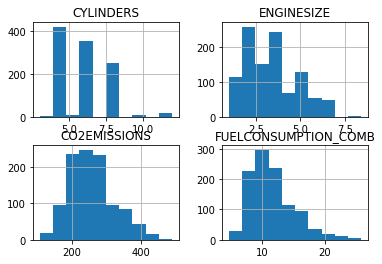

In [13]:
histogram = filtered_data[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
histogram.hist()
plt.show()

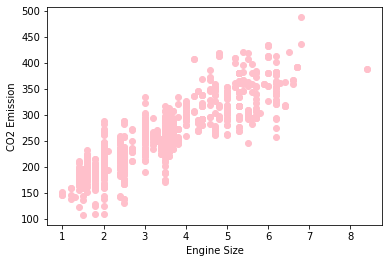

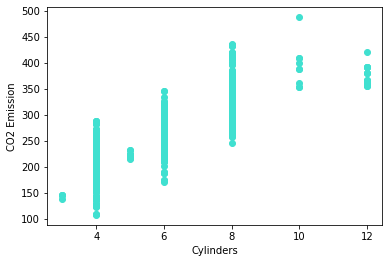

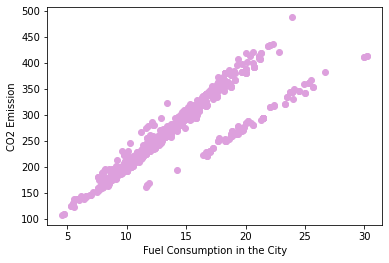

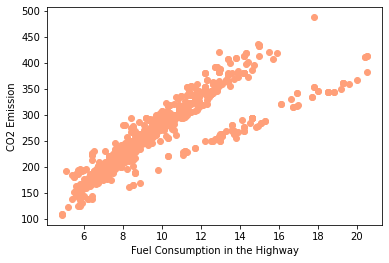

In [14]:

plt.scatter(filtered_data.ENGINESIZE, filtered_data.CO2EMISSIONS, color ='pink')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")

plt.show()

plt.scatter(filtered_data.CYLINDERS, filtered_data.CO2EMISSIONS, color ='turquoise')
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emission")

plt.show()

plt.scatter(filtered_data.FUELCONSUMPTION_CITY, filtered_data.CO2EMISSIONS, color ='plum')
plt.xlabel("Fuel Consumption in the City")
plt.ylabel("CO2 Emission")

plt.show()

plt.scatter(filtered_data.FUELCONSUMPTION_HWY, filtered_data.CO2EMISSIONS, color ='lightsalmon')
plt.xlabel("Fuel Consumption in the Highway")
plt.ylabel("CO2 Emission")

plt.show()

Train & Test Split

Here i will be using 70/30 train/test split.

In [16]:
msk=np.random.rand(len(data))<0.7
train=filtered_data[msk]
test=filtered_data[~msk]

Let us now look at the training set distribution. We will see that it is similar to the above scatter plots we created earlier

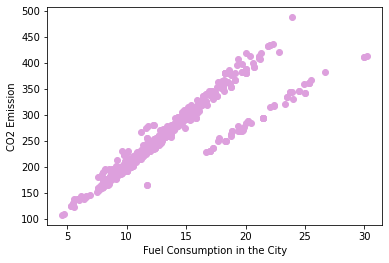

In [30]:
plt.scatter(train.FUELCONSUMPTION_CITY,train.CO2EMISSIONS, color = 'plum')
plt.xlabel("Fuel Consumption in the City")
plt.ylabel("CO2 Emission")
plt.show()

Sipler Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
reg_single = LinearRegression()
reg_single.fit(train['ENGINESIZE'].values.reshape(-1,1), train)

LinearRegression()

In [27]:
regression=reg_single.LinearRegression()
x=np.asanyarray(train[['ENGINESIZE']])
y=np.asanyarray(train[['CO2EMISSIONS']])

regression.fit(x,y)

print ('Coefficients:',regression.coef_)

AttributeError: 'LinearRegression' object has no attribute 'LinearRegression'